# Assignment 4
To complete this assignment, I suggest that you read: <br>
1D_Signal_Processing_Conv_temperature.ipynb <br>
1D_Signal_Processing_Conv_peak.ipynb <br> 
If you understand the above two files, this assignment will be super easy
==============================================================================<br>
The only requirement:  <br>
This ipynb file has 11 code cells. <br>
Do NOT add or remove any cells <br>
A code cell does what it is supposed to do  <br>
For example, cell In [2] is to load data from ecg_data1.csv using pandas  <br>
==============================================================================<br>
Once you complete the file, go to the menu: Kernel -> Restart & Run All, and check the output of each cell

In [1]:
# import the modules in the first cell
%matplotlib notebook
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import scipy
import scipy.ndimage

Load the ECG data from ecg_data1.csv using pandas <br>
ATTN: this ipynb file of the assignment and the data file ecg_data1.csv should be in the same file folder  <br>
the ECG signal should be stored in a numpy array  <br>
the Sampling Rate is known as 1000Hz  <br>

In [2]:
# load data from ecg_data1.csv using pandas
# Get the 'Amp' volume and convert it to a numpy array x
# write your code here

data = pd.read_csv('ecg_data1.csv')
x = data['Amp'].values




In [3]:
#read but do not modify this section
fs = 1000 # sampling rate (Hz)
Ts = 1/fs # sampling intervel (seconds)
N = x.shape[0] # total number of data points in the ECG signal x
Duration= N*Ts #seconds

Visualize the ECG signal x

Datapoints:  15000
Seconds:  15.0
Time:  [0.0000e+00 1.0000e-03 2.0000e-03 ... 1.4997e+01 1.4998e+01 1.4999e+01]
X:  [2044. 2044. 2044. ... 2044. 2045. 2043.]


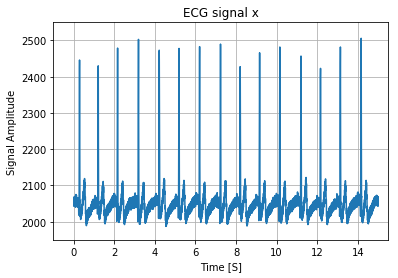

In [4]:
# write your code here
fig, ax = plt.subplots()
time = np.arange(15000)/fs
print('Datapoints: ',N)
print('Seconds: ',Duration)
print('Time: ',time)
print('X: ',x)
ax.plot(time,x,'-')
ax.set_xlim(0,15)
plt.axis([-1,15.5, 1950,2550])
ax.set_xlabel('Time [S]')
ax.set_ylabel('Signal Amplitude')
ax.set_title('ECG signal x')
ax.grid(True)

Build a GaussianKernel for smoothing the ECG signal x

In [5]:
# hint: try to use different sigma
# write your code here
conv_kernel = np.ones(20)
conv_kernel /= conv_kernel.sum()
conv_kernel

array([0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
       0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

Smooth the ECG signal x using convolution with GaussianKernel <br>
Visualize the smoothed signal x_smoothed

Datapoints:  15000
Seconds:  15.0
Time:  [0.0000e+00 1.0000e-03 2.0000e-03 ... 1.4997e+01 1.4998e+01 1.4999e+01]
X:  [2044. 2044. 2044. ... 2044. 2045. 2043.]


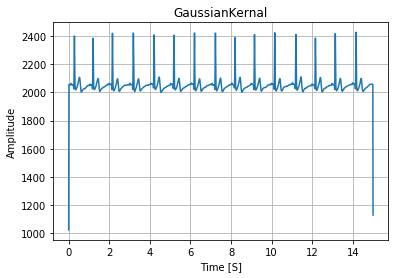

In [6]:
# write your code here
smoothed_Amp = np.convolve(x, conv_kernel, mode='same')
fig, ax = plt.subplots()
time = np.arange(15000)/fs
print('Datapoints: ',N)
print('Seconds: ',Duration)
print('Time: ',time)
print('X: ',x)
ax.plot(time,smoothed_Amp,'-')
#plt.axis([-0.0150,0.010,0.0,0.40])
ax.set_xlabel('Time [S]')
ax.set_ylabel('Amplitude')
ax.set_title('GaussianKernal')
ax.grid(True)

Perform peak detection using two convolution kernals <br>

In [7]:
# in this section, a numpy array PeakIndexArray is obtained
# which stores the indexes of the detected peaks in the ECG signal x
# write your code here
h1 = [-1, 1, 0] 
h2 = [0, 1, -1] 
y = scipy.ndimage.convolve(x, h1, mode='nearest')
z = scipy.ndimage.convolve(x, h2, mode='nearest')
IndexArray1= np.where(y>0) 
IndexArray2= np.where(z>0) 
PeakIndexArray = np.intersect1d(IndexArray1, IndexArray2) 
time[PeakIndexArray] 
x[PeakIndexArray] 

array([2068., 2068., 2070., 2067., 2066., 2075., 2073., 2064., 2446.,
       2059., 2008., 2031., 2014., 2039., 2018., 2048., 2061., 2063.,
       2046., 2046., 2057., 2084., 2102., 2114., 2108., 2069., 2031.,
       2032., 2016., 1993., 2016., 1996., 2022., 2038., 2039., 2038.,
       2038., 2055., 2056., 2061., 2062., 2068., 2072., 2064., 2067.,
       2027., 2056., 2031., 2044., 2053., 2034., 2060., 2070., 2055.,
       2066., 2098., 2086., 2097., 2061., 2033., 2039., 2041., 2041.,
       2043., 2048., 2027., 2051., 2050., 2058., 2058., 2063., 2064.,
       2067., 2071., 2071., 2068., 2069., 2078., 2069., 2044., 2035.,
       2479., 2048., 2028., 2029., 2043., 2063., 2042., 2077., 2096.,
       2107., 2107., 2032., 2023., 2004., 2034., 2044., 2047., 2055.,
       2056., 2065., 2066., 2064., 2067., 2067., 2068., 2044., 2070.,
       2078., 2070., 2070., 2070., 2069., 2071., 2049., 2503., 2030.,
       2020., 2025., 2061., 2108., 2086., 2051., 2027., 2029., 2034.,
       2035., 2038.,

Visualize the ECG signal and the detected peaks

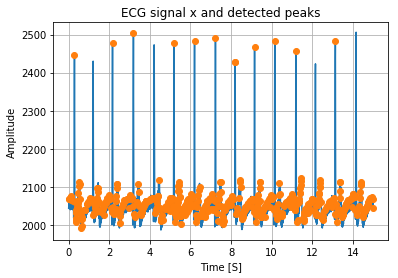

In [8]:
# write your code here
fig, ax = plt.subplots()
ax.plot(time,x,'-')
ax.plot(time[PeakIndexArray], x[PeakIndexArray],'o') #plots peaks with 'o'
#plt.axis([0.5,1,0,0.4])
ax.set_xlabel('Time [S]')
ax.set_ylabel('Amplitude')
ax.set_title('ECG signal x and detected peaks')
ax.grid(True)

We need to find the R-peaks <br>
https://en.wikipedia.org/wiki/Electrocardiography  <br>
Select those peaks with amplitude values > threshold (e.g. 2200) <br>

In [9]:
# hint:
# assume the numpy array PeakIndexArray stores the indexes of the detected peaks in the ECG signal x
# then we can use the function np.where to find the the indexes of the peaks with amplitudes > threshold
# try this: RPeakIndexArray=PeakIndexArray[np.where(x[PeakIndexArray] > threshold)]
# write your code here
threshold = 2200
RPeakIndexArray=PeakIndexArray[np.where(x[PeakIndexArray] > threshold)]


Visualize the R-peaks

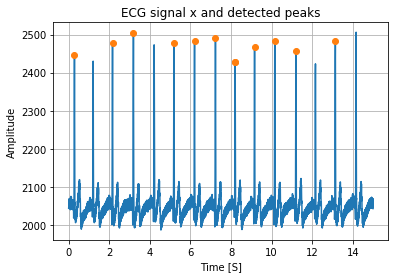

In [10]:
# write your code here
fig, ax = plt.subplots()
ax.plot(time,x,'-')
ax.plot(time[RPeakIndexArray], x[RPeakIndexArray],'o')
ax.set_xlabel('Time [S]')
ax.set_ylabel('Amplitude')
ax.set_title('ECG signal x and detected peaks')
ax.grid(True)

Calculate heart rate per minute based on the R-wave peaks

12
[ 0.286  2.161  3.191  5.19   6.203  7.233  8.201  8.203  9.16  10.158
 11.2   13.142]
[0.0000e+00 1.0000e-03 2.0000e-03 ... 1.4997e+01 1.4998e+01 1.4999e+01]


ValueError: x and y must have same first dimension, but have shapes (15000,) and (12,)

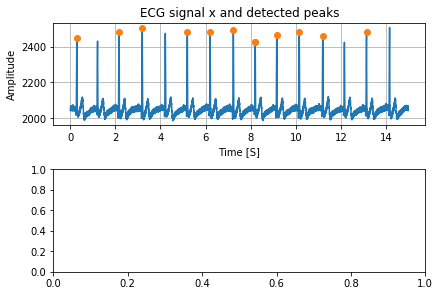

In [11]:
# assume the numpy array RPeakIndexArray stores the indexes of the R-peaks in the ECG signal x
# step-1: create a numpy array (google np.zeros) that has the same shape as RPeakIndexArray
# step-2: in a range-based for loop: HeartRate[n]=60*fs/(RPeakIndexArray[n]-RPeakIndexArray[n-1])
#         It should be range(1, RPeakIndexArray.shape[0]), think about why not range(0, RPeakIndexArray.shape[0])
# step-3: set HeartRate[0] to be equal to HeartRate[1]
# step-4: plot the signal x and the HeartRate curve
#         RPeakIndexArray stores the indexes, not timepoints
#         to get the timepoints: RPeakTimeArray = RPeakIndexArray*Ts
# write your code here

size = RPeakIndexArray.shape[0]
HeartRate=np.zeros(size)
print(size)
n=1
for n in range(1, RPeakIndexArray.shape[0]):
    HeartRate[n]=60*fs/(RPeakIndexArray[n]-RPeakIndexArray[n-1])
    HeartRate[0] = HeartRate[1]

fig, ax = plt.subplots(2,1,constrained_layout=True)
ax[0].plot(time,x,'-')
ax[0].plot(time[RPeakIndexArray], x[RPeakIndexArray],'o')
#plt.axis([0.5,1,0,0.4])
ax[0].set_xlabel('Time [S]')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('ECG signal x and detected peaks')
ax[0].grid(True)
RPeakTimeArray = RPeakIndexArray*Ts
print(RPeakTimeArray)
print(time)
ax[1].plot(time,RPeakTimeArray)
#plt.axis([0.5,1,0,0.4])
ax[1].set_xlabel('Time [S]')
ax[1].set_ylabel('Heart Rate per minute')
ax[1].set_title('Heart Rate')
ax[1].grid(True)
